## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [0]:
import os
import keras
from keras.layers import Dense, Input
from keras.models import Sequential 

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [0]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:

def build_mlp():
    """Code Here
    建立你的神經網路
    """
    model = Sequential()
    model.add(Dense(units=1024, activation="relu", input_shape=(3072,)))
    model.add(Dense(units=512, activation="relu"))
    model.add(Dense(units=256, activation="relu"))
    model.add(Dense(units=128, activation="relu"))
    model.add(Dense(units=64, activation="relu"))
    model.add(Dense(units=10, activation="softmax"))

    return model
model = build_mlp()

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 3,844,682
Trainable params: 3,844,682
Non-trainable params: 0
____________________________________________

In [0]:
"""
Compile 模型
"""
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer="SGD",
              metrics=["accuracy"])

In [21]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 59us/step - loss: 2.1110 - accuracy: 0.2488 - val_loss: 1.9782 - val_accuracy: 0.2776
Epoch 2/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.9155 - accuracy: 0.3131 - val_loss: 1.9457 - val_accuracy: 0.3058
Epoch 3/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.8416 - accuracy: 0.3429 - val_loss: 1.8768 - val_accuracy: 0.3242
Epoch 4/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.7826 - accuracy: 0.3665 - val_loss: 1.7945 - val_accuracy: 0.3686
Epoch 5/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.7386 - accuracy: 0.3815 - val_loss: 1.7229 - val_accuracy: 0.3836
Epoch 6/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.7019 - accuracy: 0.3975 - val_loss: 1.7029 - val_accuracy: 0.3888
Epoch 7/500
50000/50000 [==============================] - 1s 

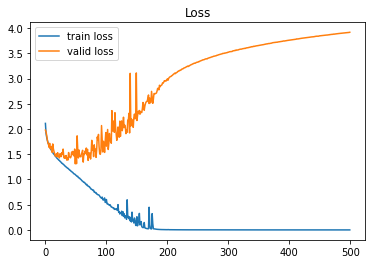

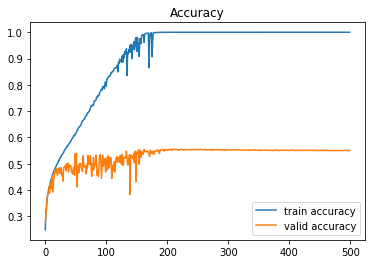

In [23]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()